In [108]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [109]:
Bank_America = pd.read_table("Bank_America_After_Encoding.txt",sep=",")

C:\Users\iheb_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [110]:
Bank_America.head(1)

,Unnamed: 0,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,HomeImp,Mgr,Office,Other,ProfExe,Sales,Self
0,0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.898413,0,1,0,0,1,0,0,0


In [111]:
Bank_America.columns

Index(['Unnamed: 0', 'BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'DebtCon', 'HomeImp',
       'Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self'],
      dtype='object')

In [112]:
Bank_America.drop(['Unnamed: 0'],axis=1,inplace=True)

In [113]:
dataCible=Bank_America.iloc[:,0]
dataSansCible=Bank_America.iloc[:,1:] 


# ACP

In [114]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
Bank_America_Final = Bank_America 
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(Bank_America_Final)
print(Z)

[[ 2.01032709 -1.56675832 -0.99592197 ... -0.52804889 -0.13787464
  -0.18432658]
 [ 2.01032709 -1.54898035 -0.04775352 ... -0.52804889 -0.13787464
  -0.18432658]
 [ 2.01032709 -1.53120238 -1.26110791 ... -0.52804889 -0.13787464
  -0.18432658]
 ...
 [-0.49743149  6.2644364  -0.39120792 ... -0.52804889 -0.13787464
  -0.18432658]
 [-0.49743149  6.3177703  -0.47005568 ... -0.52804889 -0.13787464
  -0.18432658]
 [-0.49743149  6.32665929 -0.5035043  ... -0.52804889 -0.13787464
  -0.18432658]]


In [115]:
import numpy

print(numpy.mean(Z,axis=0))
print(numpy.std(Z,axis=0,ddof=0))

[-4.86423232e-17  1.16741576e-16  1.55655434e-16 -5.83707878e-17
  2.91853939e-17 -9.72846463e-18  4.86423232e-18 -2.82125474e-16
 -1.09445227e-16 -1.16741576e-16 -5.83707878e-17 -1.36198505e-16
  5.83707878e-17  3.89138585e-17 -2.31051035e-17  1.45926970e-17
  4.86423232e-18 -9.72846463e-18  1.45926970e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [116]:
#Instanciation et lancement des calculs
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [117]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) #18

19


In [118]:
print(acp.explained_variance_)

[2.67149824e+00 2.13808689e+00 1.72526790e+00 1.40998175e+00
 1.29754860e+00 1.22470540e+00 1.13174653e+00 1.08172363e+00
 1.00958326e+00 8.91243821e-01 8.86662820e-01 8.44431681e-01
 7.51210571e-01 6.74163104e-01 6.26326491e-01 5.48687757e-01
 9.03838728e-02 8.34287017e-32 3.19261037e-32]


In [141]:
#valeur corrigée
n=19
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[2.53089307e+00 2.02555600e+00 1.63446433e+00 1.33577218e+00
 1.22925657e+00 1.16024722e+00 1.07218093e+00 1.02479080e+00
 9.56447304e-01 8.44336252e-01 8.39996355e-01 7.99987908e-01
 7.11673173e-01 6.38680836e-01 5.93361939e-01 5.19809454e-01
 8.56268269e-02 7.90377174e-32 3.02457824e-32]


In [142]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[1.40581106e-01 1.12511630e-01 9.07880331e-02 7.41968650e-02
 6.82803437e-02 6.44471471e-02 5.95554127e-02 5.69230787e-02
 5.31268674e-02 4.68995415e-02 4.66584775e-02 4.44361663e-02
 3.95306319e-02 3.54761960e-02 3.29589105e-02 2.88733606e-02
 4.75623179e-03 4.39023280e-33 1.68003367e-33]


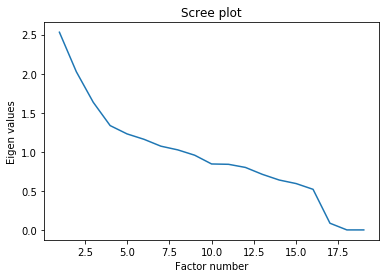

In [143]:
#scree plot
#R1+R2+R3+R4+R5+R6 +>0.5331282206 
plt.plot(numpy.arange(1,20),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

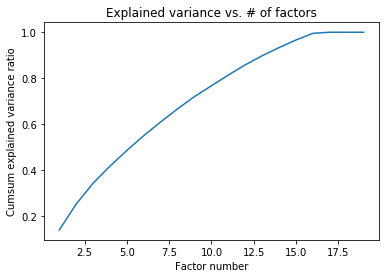

In [144]:
#cumul de variance expliquée
plt.plot(numpy.arange(1,19+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()
#

In [145]:
#seuils pour test des bâtons brisés
bs = 1/numpy.arange(19,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]


In [146]:
#test des bâtons brisés
import pandas
print(pandas.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

      Val.Propre    Seuils
0   2.530893e+00  3.547740
1   2.025556e+00  2.547740
2   1.634464e+00  2.047740
3   1.335772e+00  1.714406
4   1.229257e+00  1.464406
5   1.160247e+00  1.264406
6   1.072181e+00  1.097740
7   1.024791e+00  0.954883
8   9.564473e-01  0.829883
9   8.443363e-01  0.718771
10  8.399964e-01  0.618771
11  7.999879e-01  0.527862
12  7.116732e-01  0.444529
13  6.386808e-01  0.367606
14  5.933619e-01  0.296177
15  5.198095e-01  0.229511
16  8.562683e-02  0.167011
17  7.903772e-32  0.108187
18  3.024578e-32  0.052632


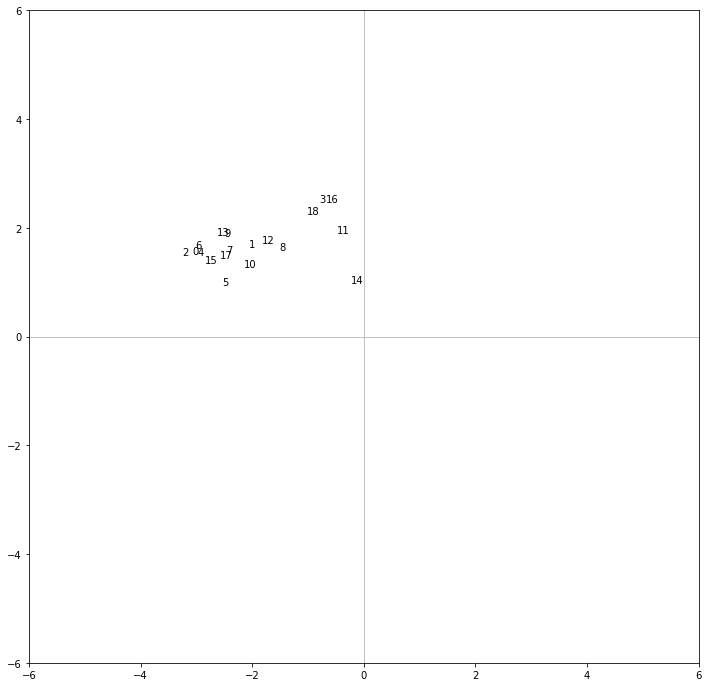

In [147]:
#positionnement des individus dans le premier plan
X= Bank_America_Final

fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(Bank_America_Final.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [148]:
#contribution des individus dans l'inertie totale
di = numpy.sum(Z**2,axis=1)
print(pandas.DataFrame({'ID':X.index,'d_i':di}));


        ID         d_i
0        0   18.061446
1        1   16.843592
2        2   18.809797
3        3   16.982613
4        4   17.860541
5        5   28.851418
6        6   18.638115
7        7   18.184812
8        8   68.478294
9        9   22.428856
10      10   16.401109
11      11   17.089030
12      12   14.491949
13      13   19.978311
14      14   48.574757
15      15   17.953014
16      16   17.366712
17      17   16.254683
18      18   23.854984
19      19   26.585983
20      20   47.388975
21      21   26.088443
22      22   22.618732
23      23   16.921615
24      24   18.250097
25      25   21.152510
26      26   43.289173
27      27   15.631921
28      28  225.061780
29      29   39.655305
...    ...         ...
5813  5813   53.524408
5814  5814   56.984371
5815  5815   35.271750
5816  5816   77.258755
5817  5817   77.517552
5818  5818   43.820122
5819  5819   42.473546
5820  5820   43.011798
5821  5821   43.654765
5822  5822   44.921132
5823  5823   45.335649
5824  5824 

In [149]:
#qualité de représentation des individus - COS2
p=18
cos2 = coord**2
for j in range(19):
 cos2[:,j] = cos2[:,j]/di
print(pandas.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

        id    COS2_1    COS2_2
0        0  0.524451  0.126124
1        1  0.250379  0.160788
2        2  0.561866  0.118697
3        3  0.037150  0.358105
4        4  0.496737  0.126107
5        5  0.221559  0.030586
6        6  0.489370  0.142117
7        7  0.333328  0.129068
8        8  0.033049  0.036827
9        9  0.278819  0.151455
10      10  0.283009  0.099298
11      11  0.013324  0.213377
12      12  0.230226  0.203333
13      13  0.348716  0.173969
14      14  0.001040  0.019706
15      15  0.449988  0.102279
16      16  0.025908  0.351863
17      17  0.407699  0.126460
18      18  0.043222  0.211543
19      19  0.146706  0.073656
20      20  0.170078  0.075176
21      21  0.523779  0.046837
22      22  0.105502  0.083548
23      23  0.035352  0.366892
24      24  0.466046  0.122350
25      25  0.335475  0.127415
26      26  0.051543  0.201267
27      27  0.001501  0.475846
28      28  0.000370  0.005270
29      29  0.269192  0.019740
...    ...       ...       ...
5813  58

In [150]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pandas.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

        id     CTR_1     CTR_2
0        0  0.196984  0.059191
1        1  0.087701  0.070370
2        2  0.219781  0.058013
3        3  0.013120  0.158022
4        4  0.184499  0.058524
5        5  0.132932  0.022929
6        6  0.189676  0.068826
7        7  0.126053  0.060986
8        8  0.047063  0.065528
9        9  0.130048  0.088266
10      10  0.096526  0.042317
11      11  0.004735  0.094747
12      12  0.069383  0.076566
13      13  0.144878  0.090309
14      14  0.001051  0.024872
15      15  0.168001  0.047712
16      16  0.009357  0.158779
17      17  0.137813  0.053411
18      18  0.021442  0.131123
19      19  0.081110  0.050882
20      20  0.167609  0.092567
21      21  0.284164  0.031750
22      22  0.049625  0.049103
23      23  0.012440  0.161318
24      24  0.176875  0.058019
25      25  0.147569  0.070030
26      26  0.046400  0.226388
27      27  0.000488  0.193277
28      28  0.001730  0.030818
29      29  0.221991  0.020340
...    ...       ...       ...
5813  58

In [151]:
sqrt_eigval = numpy.sqrt(eigval)
#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)
#on affiche pour les deux premiers axes
print(pandas.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))


ValueError: could not broadcast input array from shape (19) into shape (18)

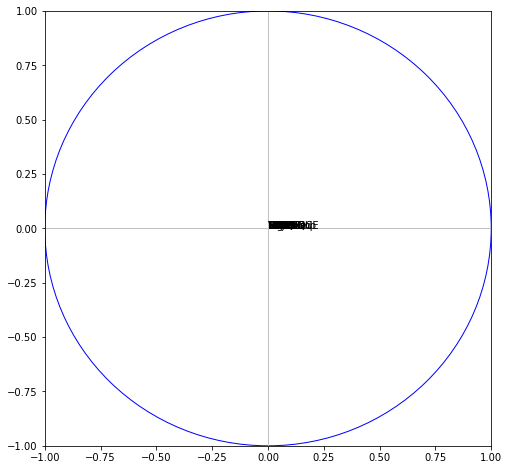

In [152]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()


# Kmeans

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

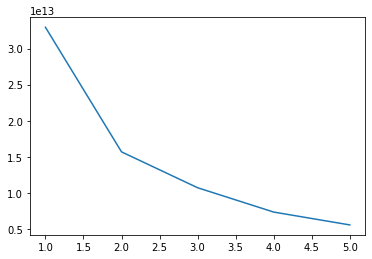

In [33]:
# Déterminer le nombre de cluster (L-Bow)
L = []
for i in range(1,6):
    model = KMeans(n_clusters=i)
    model.fit(dataSansCible)
    L.append(model.inertia_)
plt.plot(range(1,6),L)

In [35]:
# Nombre de cluster = 2 
kmeans = KMeans(n_clusters=2, precompute_distances='auto')
kmeans.fit(dataSansCible)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
y_kmeans = kmeans.fit_predict(dataSansCible)


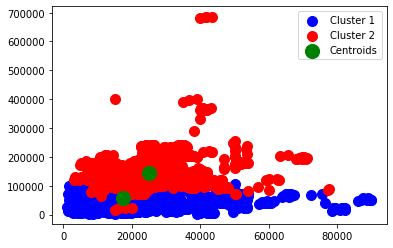

In [37]:
plt.scatter(dataSansCible.values[y_kmeans == 0, 0], dataSansCible.values[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(dataSansCible.values[y_kmeans == 1, 0], dataSansCible.values[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'green', label = 'Centroids')
plt.legend()
plt.show()

In [38]:
idk = np.argsort(kmeans.labels_)
pd.crosstab(dataCible,kmeans.labels_)


col_0,0,1
BAD,,
0,3812,872
1,956,203


# CAH

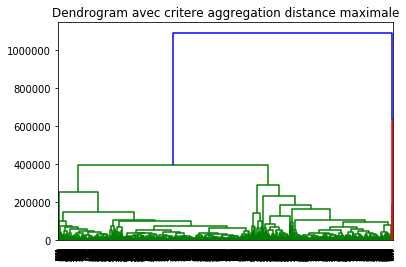

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
matrice1=linkage(dataSansCible, 'complete')
dendrogram(matrice1)
plt.title('Dendrogram avec critere aggregation distance maximale')
plt.show()


In [42]:
groupes_cah = fcluster(matrice1,t=700000,criterion='distance') 
idg = np.argsort(groupes_cah)
# CrossTable
pd.crosstab(dataCible,groupes_cah)

col_0,1,2
BAD,,
0,4675,9
1,1149,10


# KNN

In [14]:
print(Bank_America.groupby('BAD').size())

BAD
0    4684
1    1159
dtype: int64


In [15]:
X = dataSansCible
y = dataCible

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [44]:
X_test

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,HomeImp,Mgr,Office,Other,ProfExe,Sales,Self
2014,13100,73987.00,106557.0,9.0,0.0,0.0,149.452529,1.0,13.0,37.008527,1,0,0,1,0,0,0,0
1161,10100,114590.00,215784.0,2.0,0.0,0.0,123.169183,0.0,14.0,27.845084,0,1,0,0,0,1,0,0
4029,21600,45421.00,75632.0,2.0,0.0,1.0,230.242235,0.0,11.0,33.457381,1,0,0,1,0,0,0,0
3327,18000,77620.80,97026.0,4.0,0.0,0.0,182.597816,1.0,9.0,30.675510,1,0,0,0,1,0,0,0
3048,17000,125728.00,159770.0,11.0,0.0,0.0,228.422382,0.0,18.0,37.008374,1,0,1,0,0,0,0,0
1328,10700,67523.00,85560.0,5.0,0.0,0.0,126.842935,0.0,35.0,26.001665,1,0,0,0,0,0,1,0
3985,21400,88147.00,115000.0,3.0,0.0,0.0,213.233333,2.0,27.0,34.885541,1,0,0,0,0,0,0,1
2228,13900,63831.00,81378.0,9.0,1.0,1.0,148.355221,1.0,17.0,24.371050,1,0,0,0,1,0,0,0
4203,22400,95539.00,124566.0,9.0,0.0,0.0,140.695502,1.0,24.0,31.869810,0,1,1,0,0,0,0,0
4473,24000,96072.00,122441.0,10.0,0.0,0.0,127.741782,1.0,24.0,33.608037,0,1,1,0,0,0,0,0


Text(0, 0.5, 'Erreur')

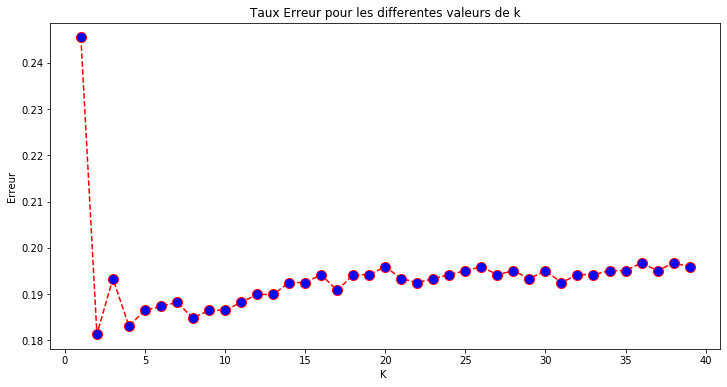

In [17]:
from sklearn.neighbors import KNeighborsClassifier
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [18]:
knn = KNeighborsClassifier(1)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [19]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.75


In [23]:
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn

0.7544910179640718

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn)) 

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       927
           1       0.74      0.72      0.73       242

    accuracy                           0.89      1169
   macro avg       0.84      0.83      0.83      1169
weighted avg       0.89      0.89      0.89      1169



# CART

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.43


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))


              precision    recall  f1-score   support

           0       0.86      0.34      0.48       927
           1       0.24      0.79      0.36       242

    accuracy                           0.43      1169
   macro avg       0.55      0.56      0.42      1169
weighted avg       0.73      0.43      0.46      1169



In [1]:
### Pikle knn 

In [31]:

import pickle
with open('testFinal.pkl','wb') as file:
    pickle.dump(random_forest,file)

In [32]:
with open ('testFinal.pkl','rb') as file:
    data = pickle.load(file)

In [35]:
x=random_forest.score(X_test,y_test)
x
print(x)

0.9178785286569717


In [42]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(random_forest, 'filename.pkl')

C:\Users\iheb_\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['filename.pkl']

In [40]:
import pickle
with open('RANDM.pkl','wb') as file:
    pickle.dump([random_forest,x],file)

In [41]:
with open ('RANDM.pkl','rb') as file:
    data = pickle.load(file)

In [43]:
# Load the model from the file 
knn_from_joblib = joblib.load('filename.pkl')  
  
# Use the loaded model to make predictions 
knn_from_joblib.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Perceptron

In [98]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
predictions0 = perceptron.predict(X_test)
acc_perceptron = accuracy_score(y_test, predictions0)
acc_perceptron

0.7929854576561164

# Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
predictions_B = gaussian.predict(X_test)
acc_gaussian = accuracy_score(y_test, predictions_B)
acc_gaussian

0.8058169375534645

# Déscente du gradient

In [97]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
predictionss = sgd.predict(X_test)
acc_sgd = accuracy_score(y_test, predictionss)
acc_sgd

0.7887082976903336

# SVM

In [134]:
from sklearn.svm import SVC, LinearSVC
svc1 = SVC(kernel="linear")
svc1_model=svc1.fit(X_train, y_train)
y_pred_svc1 = svc1_model.predict(X_test)


0.7929854576561164

In [135]:
acc_svc = accuracy_score(y_test, y_pred_svc1)
acc_svc


0.8032506415739948

# Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest_model=random_forest.fit(X_train, y_train)
predictions_rf = random_forest_model.predict(X_test)
print(random_forest.score(X_train, y_train))
acc_random_forest = accuracy_score(y_test, predictions_rf)
acc_random_forest

1.0


0.9170230966638152

In [95]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(random_forest_model, 'american_rfc_model.pkl')

['american_rfc_model.pkl']

In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       927
           1       0.97      0.62      0.75       242

    accuracy                           0.92      1169
   macro avg       0.94      0.81      0.85      1169
weighted avg       0.92      0.92      0.91      1169



# DBSCAN

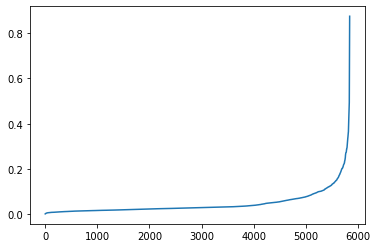

In [142]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler()
taiwan_Bank_Final_Scaled=min_max_scaler.fit_transform(dataSansCible)
nbrs=NearestNeighbors(n_neighbors=2,algorithm='ball_tree').fit(taiwan_Bank_Final_Scaled)
distances, indices=nbrs.kneighbors(taiwan_Bank_Final_Scaled)
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

In [164]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.1,min_samples=2).fit(dataSansCible)
labels=db.labels_
pd.crosstab(dataCible,labels)

col_0,-1
BAD,
0,4684
1,1159


# Tableau Comparatif

In [136]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
models.sort_values(by="Score",ascending=False)

,Model,Score
2,Random Forest,0.917023
3,Naive Bayes,0.805817
0,Support Vector Machines,0.803251
4,Perceptron,0.792985
5,Stochastic Gradient Decent,0.788708
1,KNN,0.754491
6,Decision Tree,0.436270


# ROC

In [95]:
from sklearn.metrics import roc_curve, auc

In [137]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_svc1) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, predictions_rf) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, predictions_B) 
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(y_test, predictionss) 
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold6 = roc_curve(y_test, predictions0)
roc_auc6 = auc(fpr6, tpr6)
fpr7, tpr7, threshold7 = roc_curve(y_test, y_pred_dtc)
roc_auc7 = auc(fpr7, tpr7)

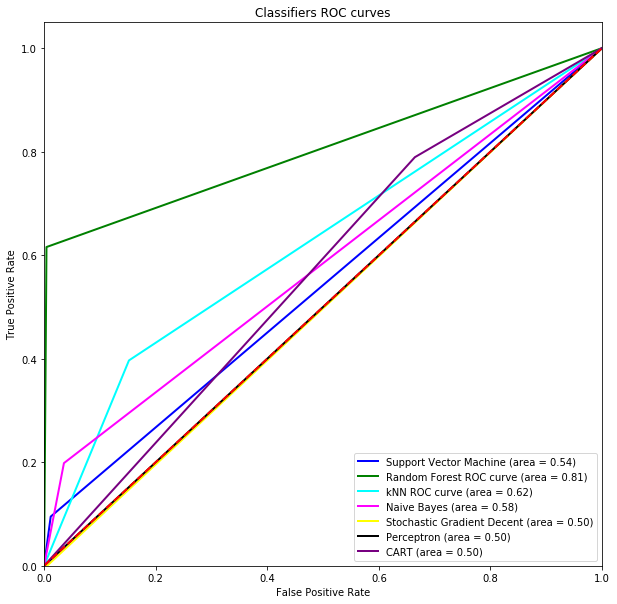

In [138]:
plt.figure(figsize=(10,10)) 
plt.plot(fpr1, tpr1, color='blue', lw=2, label='Support Vector Machine (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='Naive Bayes (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='yellow', lw=2, label='Stochastic Gradient Decent (area = %0.2f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='black', lw=2, label='Perceptron (area = %0.2f)'% roc_auc6)
plt.plot(fpr7, tpr7, color='#770080', lw=2, label='CART (area = %0.2f)'% roc_auc6)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

In [128]:
data_CR=Bank_America

In [129]:
from sklearn.decomposition import PCA
acp=PCA(n_components=None,svd_solver='full')
coord = acp.fit_transform(data_CR)

In [132]:
data = Bank_America

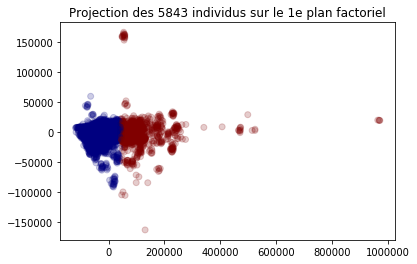

In [133]:
from sklearn import decomposition
clusters = kmeans.labels_
pca = decomposition.PCA(n_components = 2).fit(data)
data_projected = pca.transform(data)
plt.scatter(data_projected[:, 0], data_projected[:, 1], c = clusters.astype(np.float), cmap = 'jet', alpha = .2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(data_projected.shape[0]))
plt.show(block = False)

In [140]:
print(acp)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [141]:
coord = acp.fit_transform(Bank_America)
#nombre de composantes calculées
print(acp.n_components_) 

19
